In [ ]:
!pip install sentence-transformers scikit-learn numpy pandas matplotlib seaborn


In [8]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances
from sentence_transformers import SentenceTransformer

c:\Users\email\Desktop\DS_Science_Youth_Extension\2504_Science_Youth\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [9]:
# Load preprocessed text
input_json = "..\data\processed_papers.json"

In [10]:
with open(input_json, "r", encoding="utf-8") as f:
    papers = json.load(f)

# Extract text and filenames
texts = [paper["text"] for paper in papers]
file_names = [paper["file_name"] for paper in papers]


In [11]:
# Load pre-trained BERT model for embeddings
model = SentenceTransformer("all-MiniLM-L6-v2")  # Efficient and accurate


In [12]:
# Generate BERT embeddings
embeddings = model.encode(texts, show_progress_bar=True)


Batches: 100%|██████████| 23/23 [01:57<00:00,  5.11s/it]


In [13]:
# Compute similarity metrics
cosine_sim_matrix = cosine_similarity(embeddings)
euclidean_dist_matrix = euclidean_distances(embeddings)


In [14]:
# Convert similarity matrices to DataFrames for better readability
cosine_df = pd.DataFrame(cosine_sim_matrix, index=file_names, columns=file_names)
euclidean_df = pd.DataFrame(euclidean_dist_matrix, index=file_names, columns=file_names)


In [24]:
# Clustering using K-Means
num_clusters = 4  # You can experiment with this
kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init=10)
clusters = kmeans.fit_predict(embeddings)



In [25]:
# Attach cluster labels to papers
for i, paper in enumerate(papers):
    paper["cluster"] = int(clusters[i])


In [26]:
# Save clustered data
output_json = "..\data\clustered_papers.json"
with open(output_json, "w", encoding="utf-8") as f:
    json.dump(papers, f, indent=4)



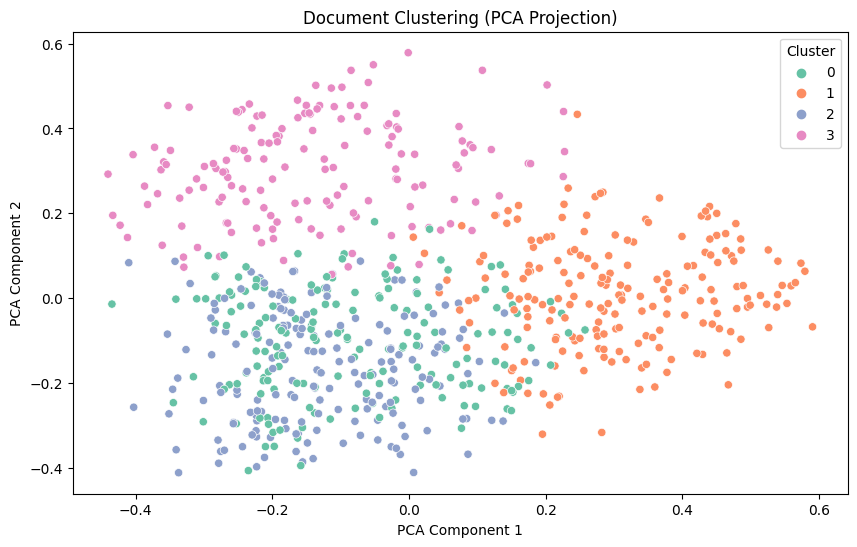

Clustering complete! Results saved in 'clustered_papers.json'


In [27]:
# Visualization: Plot clusters in 2D using PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(embeddings)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=reduced_embeddings[:, 0], y=reduced_embeddings[:, 1], hue=clusters, palette="Set2")
plt.title("Document Clustering (PCA Projection)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster")
plt.show()

print("Clustering complete! Results saved in 'clustered_papers.json'")

In [28]:
from sklearn.metrics import silhouette_score, davies_bouldin_score
import matplotlib.pyplot as plt
import numpy as np

In [29]:
# Compute Silhouette Score
silhouette = silhouette_score(embeddings, clusters)
print(f"Silhouette Score: {silhouette:.4f} (higher is better)")

Silhouette Score: 0.0487 (higher is better)


In [30]:
# Compute Davies-Bouldin Index
db_index = davies_bouldin_score(embeddings, clusters)
print(f"Davies-Bouldin Index: {db_index:.4f} (lower is better)")

Davies-Bouldin Index: 3.7484 (lower is better)


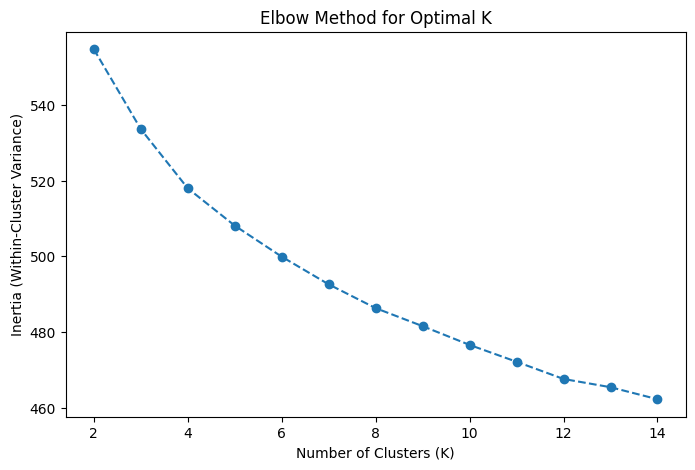

In [31]:
# Elbow Method for Optimal K Selection
inertia = []
cluster_range = range(2, 15)  # Testing different cluster numbers

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(embeddings)
    inertia.append(kmeans.inertia_)

# Plot Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(cluster_range, inertia, marker='o', linestyle='--')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia (Within-Cluster Variance)")
plt.title("Elbow Method for Optimal K")
plt.show()

In [35]:
import json

# Load the clustered data
input_json = "../data/clustered_papers.json"
output_json_sorted = "../data/clustered_papers_sorted.json"

with open(input_json, "r", encoding="utf-8") as f:
    papers = json.load(f)

# Sort papers by cluster ID
papers_sorted = sorted(papers, key=lambda x: x["cluster"])

# Save the sorted JSON file
with open(output_json_sorted, "w", encoding="utf-8") as f:
    json.dump(papers_sorted, f, indent=4)

print(f"Sorted file saved as '{output_json_sorted}'")


Sorted file saved as '../data/clustered_papers_sorted.json'
